<a href="https://colab.research.google.com/github/EduardoShoiti/DataScience_CR7_penaltis/blob/master/cr7_Penaltis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
from matplotlib import cm

## Criação e limpeza do DataFrame 

In [ ]:
dataset = pd.read_csv('Ronaldo_penalties.csv')

In [ ]:
dataset.head()

,Unnamed: 0,Season,Competition,Club,Against,Date,Minute,Goalkeeper,Success?,Score at this moment,Final result,Foot,Area
0,0,20/21,EURO 2020,Portugal,France,2021-06-23,60,Hugo Lloris,1,2:2,2:2,r,1
1,1,20/21,EURO 2020,Portugal,France,2021-06-23,30,Hugo Lloris,1,1:0,2:2,r,1
2,2,20/21,EURO 2020,Portugal,Hungary,2021-06-15,87,Péter Gulácsi,1,2:0,3:0,r,5
3,3,20/21,Serie A,Juventus FC,Inter Milan,2021-05-15,24,Samir Handanovic,0,1:0,3:2,r,3
4,4,20/21,Serie A,Juventus FC,Udinese Calcio,2021-05-02,83,Simone Scuffet,1,1:1,2:1,r,1


In [ ]:
# Transformando Date para tipo datatime
dataset['Date'] = pd.to_datetime(dataset['Date'])

In [ ]:
dataset.dtypes

Unnamed: 0                       int64
Season                          object
Competition                     object
Club                            object
Against                         object
Date                    datetime64[ns]
Minute                           int64
Goalkeeper                      object
Success?                         int64
Score at this moment            object
Final result                    object
Foot                            object
Area                             int64
dtype: object

In [ ]:
dataset[dataset.isnull()].sum()

Unnamed: 0              0.0
Season                  0.0
Competition             0.0
Club                    0.0
Against                 0.0
Minute                  0.0
Goalkeeper              0.0
Success?                0.0
Score at this moment    0.0
Final result            0.0
Foot                    0.0
Area                    0.0
dtype: float64

In [ ]:
df = dataset[['Season', 'Date', 'Competition', 'Club', 'Against', 'Minute', 'Success?', 'Foot', 'Goalkeeper', 'Score at this moment', 'Final result']]

In [ ]:
df.columns = ['Temporada', 'Data', 'Competicao', 'Clube', 'Adversario', 'Minuto', 'Gol?', 'Pe', 'Goleiro', 'Placar no momento', 'Resultado Final']

In [ ]:
df.head()

,Temporada,Data,Competicao,Clube,Adversario,Minuto,Gol?,Pe,Goleiro,Placar no momento,Resultado Final
0,20/21,2021-06-23,EURO 2020,Portugal,France,60,1,r,Hugo Lloris,2:2,2:2
1,20/21,2021-06-23,EURO 2020,Portugal,France,30,1,r,Hugo Lloris,1:0,2:2
2,20/21,2021-06-15,EURO 2020,Portugal,Hungary,87,1,r,Péter Gulácsi,2:0,3:0
3,20/21,2021-05-15,Serie A,Juventus FC,Inter Milan,24,0,r,Samir Handanovic,1:0,3:2
4,20/21,2021-05-02,Serie A,Juventus FC,Udinese Calcio,83,1,r,Simone Scuffet,1:1,2:1


## Separando pênaltis por clube

In [ ]:
df['Clube'].unique()

array(['Portugal', 'Juventus FC', 'Real Madrid', 'Manchester United'],
      dtype=object)

In [ ]:
df_portugal = df[df['Clube'] == 'Portugal']
df_portugal.reset_index(drop = True, inplace = True)
df_portugal.head()

,Temporada,Data,Competicao,Clube,Adversario,Minuto,Gol?,Pe,Goleiro,Placar no momento,Resultado Final
0,20/21,2021-06-23,EURO 2020,Portugal,France,60,1,r,Hugo Lloris,2:2,2:2
1,20/21,2021-06-23,EURO 2020,Portugal,France,30,1,r,Hugo Lloris,1:0,2:2
2,20/21,2021-06-15,EURO 2020,Portugal,Hungary,87,1,r,Péter Gulácsi,2:0,3:0
3,18/19,2019-11-14,European Qualifiers,Portugal,Lithuania,7,1,r,Ernestas Setkus,1:0,6:0
4,18/19,2019-10-14,European Qualifiers,Portugal,Ukraine,73,1,r,Andriy Pyatov,1:2,1:2


In [ ]:
df_manchesterU = df[df['Clube'] == 'Manchester United']
df_manchesterU.reset_index(drop = True, inplace = True)
df_manchesterU.head()

,Temporada,Data,Competicao,Clube,Adversario,Minuto,Gol?,Pe,Goleiro,Placar no momento,Resultado Final
0,08/09,2009-04-25,Premier League,Manchester United,Tottenham Hotspur,57,1,r,Heurelho Gomes,1:2,5:2
1,08/09,2009-03-14,Premier League,Manchester United,Liverpool FC,22,1,r,Pepe Reina,1:0,1:4
2,08/09,2009-01-31,Premier League,Manchester United,Everton FC,43,1,r,Tim Howard,1:0,1:0
3,08/09,2009-01-20,EFL Cup,Manchester United,Derby County,89,1,r,Roy Carroll,4:1,4:2
4,08/09,2008-09-27,Premier League,Manchester United,Bolton Wanderers,59,1,r,Jussi Jääskeläinen,1:0,2:0


In [ ]:
df_real_madrid = df[df['Clube'] == 'Real Madrid']
df_real_madrid.reset_index(drop = True, inplace = True)
df_real_madrid.head()

,Temporada,Data,Competicao,Clube,Adversario,Minuto,Gol?,Pe,Goleiro,Placar no momento,Resultado Final
0,17/18,2018-04-11,UEFA Champions League,Real Madrid,Juventus FC,90,1,r,Gianluigi Buffon,1:3,1:3
1,17/18,2018-02-14,UEFA Champions League,Real Madrid,Paris Saint-Germain,45,1,r,Alphonse Areola,1:1,3:1
2,17/18,2018-01-27,LaLiga,Real Madrid,Valencia CF,16,1,r,Neto,1:0,4:1
3,17/18,2018-01-27,LaLiga,Real Madrid,Valencia CF,38,1,r,Neto,2:0,4:1
4,17/18,2017-12-09,LaLiga,Real Madrid,Sevilla FC,31,1,r,Sergio Rico,3:0,5:0


In [ ]:
df_juventus = df[df['Clube'] == 'Juventus FC']
df_juventus.reset_index(drop = True, inplace = True)
df_juventus.head()

,Temporada,Data,Competicao,Clube,Adversario,Minuto,Gol?,Pe,Goleiro,Placar no momento,Resultado Final
0,20/21,2021-05-15,Serie A,Juventus FC,Inter Milan,24,0,r,Samir Handanovic,1:0,3:2
1,20/21,2021-05-02,Serie A,Juventus FC,Udinese Calcio,83,1,r,Simone Scuffet,1:1,2:1
2,20/21,2021-03-14,Serie A,Juventus FC,Cagliari Calcio,25,1,r,Alessio Cragno,2:0,3:1
3,20/21,2021-02-02,Coppa Italia,Juventus FC,Inter Milan,26,1,r,Samir Handanovic,1:1,2:1
4,20/21,2020-12-16,Serie A,Juventus FC,Atalanta BC,61,0,r,Pierluigi Gollini,1:1,1:1


## Análise por clube

### Portugal

In [ ]:
total_gols_portugal =  df_portugal['Gol?'].sum()
total_cobrancas_portugal = df_portugal['Gol?'].count()
print(f'Cobranças: {total_cobrancas_portugal} | Gols: {total_gols_portugal}')

Cobranças: 20 | Gols: 14


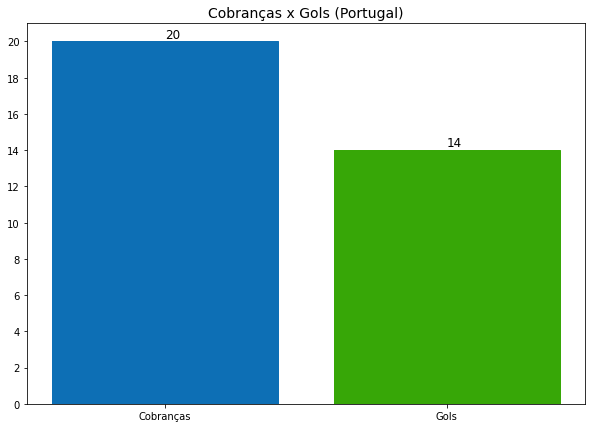

In [ ]:
plt.figure(figsize = (10, 7))

names = ['Cobranças', 'Gols']
valores = [total_cobrancas_portugal, total_gols_portugal]

plt.bar(names, valores)
plt.yticks(np.arange(0, total_cobrancas_portugal + 1, 2))
barlist = plt.bar(names, valores)
barlist[0].set_color('#0d6fb5')
barlist[1].set_color('#37a707')

plt.text(x = names[0], y = valores[0]+0.2, s = total_cobrancas_portugal, fontsize = 12)
plt.text(x = names[1], y = valores[1]+0.2, s = total_gols_portugal, fontsize = 12)
plt.title('Cobranças x Gols (Portugal)', fontsize=14)

plt.savefig('grafico-CobrancasXgols_Portugal.png', bbox_inches='tight', dpi = 300)
plt.show()

### Manchester United

In [ ]:
total_cobrancas_mu = df_manchesterU['Gol?'].count()
total_gols_mu = df_manchesterU['Gol?'].sum()
print(f'Cobranças: {total_cobrancas_mu} | Gols: {total_gols_mu}')

Cobranças: 20 | Gols: 17


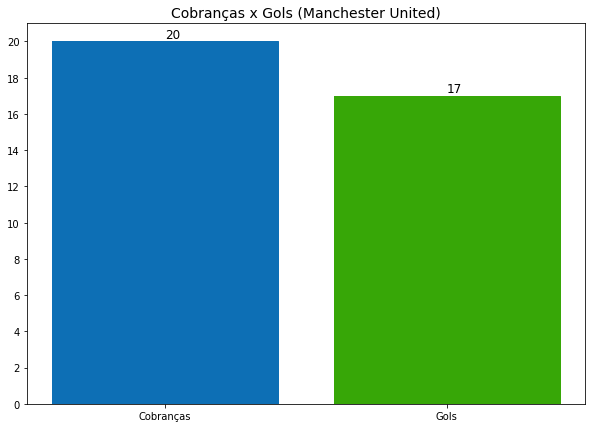

In [ ]:
plt.figure(figsize=(10, 7))

names = ['Cobranças', 'Gols']
valores = [total_cobrancas_mu, total_gols_mu]

plt.bar(names, valores)
plt.yticks(np.arange(0, total_cobrancas_mu + 1, 2))
barlist = plt.bar(names, valores)
barlist[0].set_color('#0d6fb5')
barlist[1].set_color('#37a707')

plt.text(x = names[0], y = valores[0]+0.2, s = total_cobrancas_mu, fontsize = 12)
plt.text(x = names[1], y = valores[1]+0.2, s = total_gols_mu, fontsize = 12)
plt.title('Cobranças x Gols (Manchester United)', fontsize=14)

plt.savefig('grafico-CobrancasXgols_Manchester.png', bbox_inches='tight', dpi = 300)
plt.show()

### Real Madrid

In [ ]:
total_cobrancas_real = df_real_madrid['Gol?'].count()
total_gols_real = df_real_madrid['Gol?'].sum()
print(f'Cobranças: {total_cobrancas_real} | Gols: {total_gols_real}')

Cobranças: 92 | Gols: 79


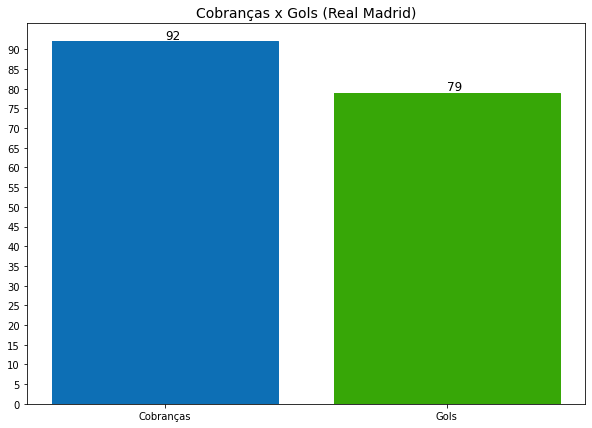

In [ ]:
plt.figure(figsize=(10, 7))

names = ['Cobranças', 'Gols']
valores = [total_cobrancas_real, total_gols_real]

plt.bar(names, valores)
plt.yticks(np.arange(0, total_cobrancas_real + 1, 5))
barlist = plt.bar(names, valores)
barlist[0].set_color('#0d6fb5')
barlist[1].set_color('#37a707')

plt.text(x = names[0], y = valores[0]+0.6, s = total_cobrancas_real, fontsize = 12)
plt.text(x = names[1], y = valores[1]+0.6, s = total_gols_real, fontsize = 12)
plt.title('Cobranças x Gols (Real Madrid)', fontsize=14)

plt.savefig('grafico-CobrancasXgols_RealMadrid.png', bbox_inches='tight', dpi = 300)
plt.show()

### Juventus

In [ ]:
total_cobrancas_juventus = df_juventus['Gol?'].count()
total_gols_juventus = df_juventus['Gol?'].sum()
print(f'Cobranças: {total_cobrancas_juventus} | Gols: {total_gols_juventus}')

Cobranças: 34 | Gols: 29


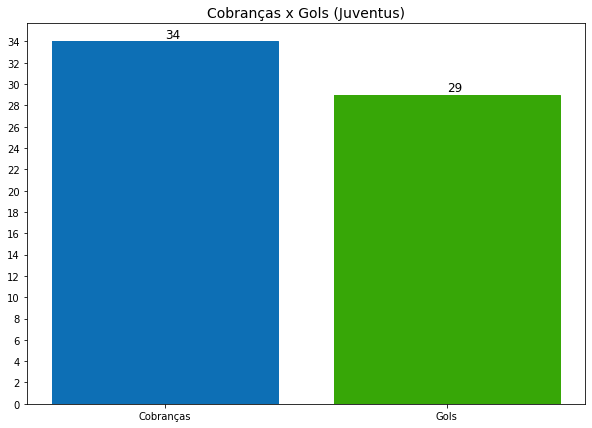

In [ ]:
plt.figure(figsize=(10, 7))

names = ['Cobranças', 'Gols']
valores = [total_cobrancas_juventus, total_gols_juventus]

plt.bar(names, valores)
plt.yticks(np.arange(0, total_cobrancas_juventus + 1, 2))
barlist = plt.bar(names, valores)
barlist[0].set_color('#0d6fb5')
barlist[1].set_color('#37a707')

plt.text(x = names[0], y = valores[0]+0.3, s = total_cobrancas_juventus, fontsize = 12)
plt.text(x = names[1], y = valores[1]+0.3, s = total_gols_juventus, fontsize = 12)
plt.title('Cobranças x Gols (Juventus)', fontsize=14)

plt.savefig('grafico-CobrancasXgols_Juventus.png', bbox_inches='tight', dpi = 300)
plt.show()

## Gols por ano (Toda Carreira)

In [ ]:
df.head()

,Temporada,Data,Competicao,Clube,Adversario,Minuto,Gol?,Pe,Goleiro,Placar no momento,Resultado Final
0,20/21,2021-06-23,EURO 2020,Portugal,France,60,1,r,Hugo Lloris,2:2,2:2
1,20/21,2021-06-23,EURO 2020,Portugal,France,30,1,r,Hugo Lloris,1:0,2:2
2,20/21,2021-06-15,EURO 2020,Portugal,Hungary,87,1,r,Péter Gulácsi,2:0,3:0
3,20/21,2021-05-15,Serie A,Juventus FC,Inter Milan,24,0,r,Samir Handanovic,1:0,3:2
4,20/21,2021-05-02,Serie A,Juventus FC,Udinese Calcio,83,1,r,Simone Scuffet,1:1,2:1


In [ ]:
cobrancas_por_ano = df.groupby(df['Data'].dt.year)['Gol?'].count()
cobrancas_por_ano

Data
2005     1
2006     3
2007     9
2008     5
2009     7
2010     8
2011    13
2012    12
2013    11
2014    14
2015    14
2016    13
2017    10
2018    10
2019     9
2020    20
2021     7
Name: Gol?, dtype: int64

In [ ]:
gols_por_ano = (df.groupby(df['Data'].dt.year)['Gol?'].sum())
gols_por_ano

Data
2005     1
2006     1
2007     8
2008     4
2009     6
2010     8
2011    13
2012    10
2013     9
2014    13
2015    11
2016     7
2017     8
2018     9
2019     8
2020    17
2021     6
Name: Gol?, dtype: int64

In [ ]:
altura_gols = []
for i in gols_por_ano:
  altura_gols.append(i)

altura_cobrancas = []
for i in cobrancas_por_ano:
  altura_cobrancas.append(i)

posicao = []
for i in range(len(cobrancas_por_ano)):
  posicao.append(i)

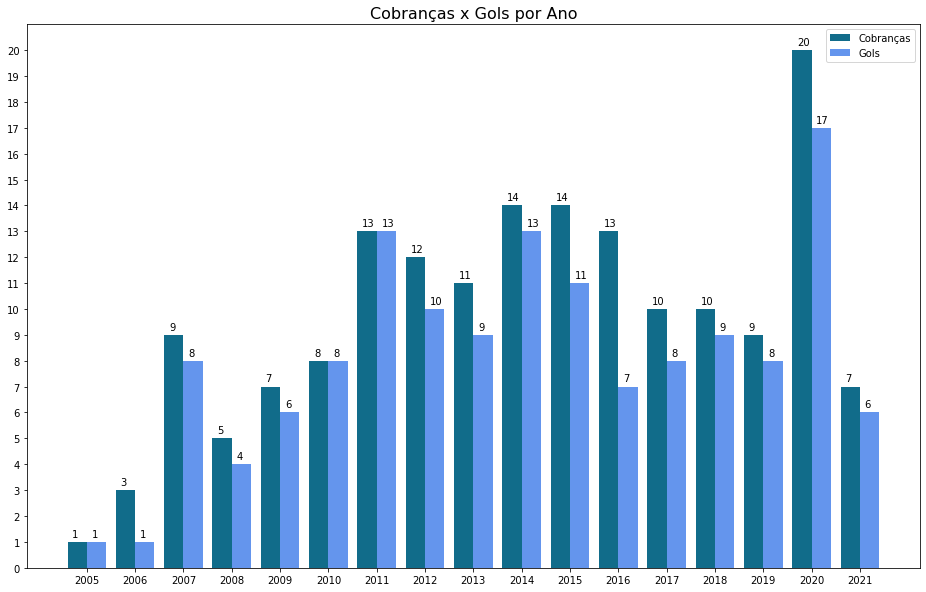

In [ ]:
plt.figure(figsize = (16, 10))

barWidth = 0.4

r1 = np.arange(len(cobrancas_por_ano))
r2 = [x + barWidth for x in r1]

#Criando as barras
plt.bar(r1, height = cobrancas_por_ano, color = '#116C8A', width = barWidth, label = 'Cobranças')
plt.bar(r2, height = gols_por_ano, color = '#6495ED', width = barWidth, label = 'Gols')

#Colocando titulo, eixo Y e X
plt.title('Cobranças x Gols por Ano', fontsize=16)
plt.yticks(np.arange(0, 21))
plt.xticks([r + 0.2 for r in range(0, 17)], np.sort(df['Data'].dt.year.unique()))

#Colocando valores em cada barra
for j in range(len(cobrancas_por_ano)):
  plt.text(x = posicao[j]-0.1, y = altura_cobrancas[j]+0.2, s = str(cobrancas_por_ano.iloc[j]))

for i in range(len(gols_por_ano)):
  plt.text(x = posicao[i]+0.3, y = altura_gols[i]+0.2, s = str(gols_por_ano.iloc[i]))


plt.legend()

#Salva o gráfico como img. (é preciso estar antes do plt.show() )
plt.savefig('grafico-CobrancasXgols_porAnoCarreira.png', bbox_inches='tight', dpi = 300)

plt.show()

## Top 10 Goleiros enfrentados

In [ ]:
top10_goleiros_enfrentados = pd.DataFrame(df['Goleiro'].value_counts())
top10_goleiros_enfrentados = top10_goleiros_enfrentados.head(10)
top10_goleiros_enfrentados

,Goleiro
Daniel Aranzubia,5
Gorka Iraizoz,5
Miguel Ángel Moyá,4
Hugo Lloris,4
Diego Alves,4
Vladislav Stoyanov,4
Javi Varas,3
Willy Caballero,3
Pierluigi Gollini,3
Víctor Valdés,3


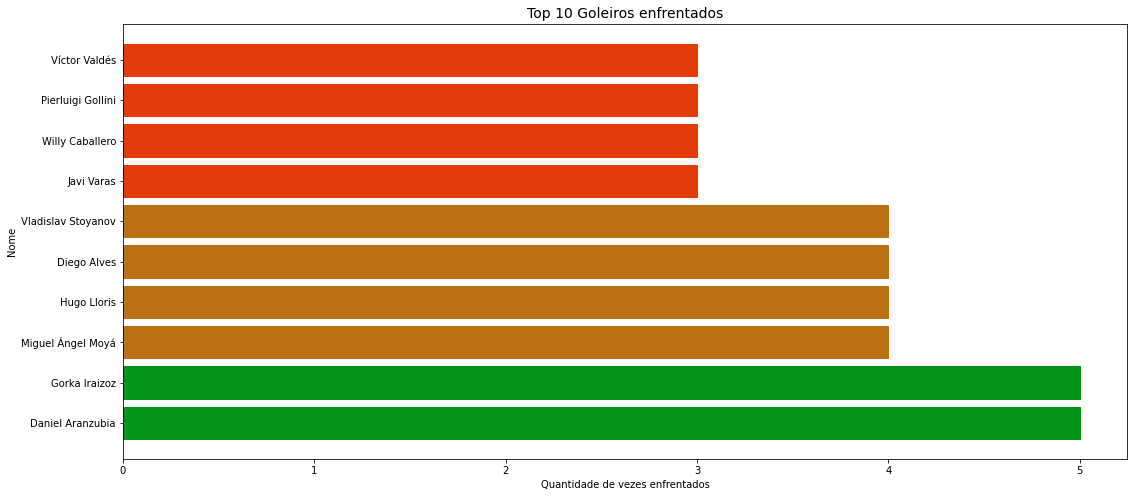

In [ ]:
plt.figure(figsize=(18, 8))

names = top10_goleiros_enfrentados.index
valores = top10_goleiros_enfrentados.Goleiro

plt.barh(names, valores)

barlist = plt.barh(names, valores)
barlist[0].set_color('#04931b')
barlist[1].set_color('#04931b')
barlist[2].set_color('#bb7013')
barlist[3].set_color('#bb7013')
barlist[4].set_color('#bb7013')
barlist[5].set_color('#bb7013')
barlist[6].set_color('#e33c0a')
barlist[7].set_color('#e33c0a')
barlist[8].set_color('#e33c0a')
barlist[9].set_color('#e33c0a')

plt.xlabel('Quantidade de vezes enfrentados')
plt.ylabel('Nome')
plt.title('Top 10 Goleiros enfrentados', fontsize=14)

plt.savefig('grafico-Top10GoleirosEnfrentados.png', bbox_inches='tight', dpi = 300)
plt.show()

## Gols por Temporada

In [ ]:
gols_por_temporada = pd.DataFrame(df.groupby(df['Temporada'])['Gol?'].sum())
gols_por_temporada

,Gol?
Temporada,
05/06,2
06/07,5
07/08,6
08/09,6
09/10,4
10/11,10
11/12,14
12/13,7
13/14,10


In [ ]:
posicao = []
for i in range(len(gols_por_temporada.index)):
  posicao.append(i)

altura_gols = []
for i in gols_por_temporada['Gol?']:
  altura_gols.append(i)

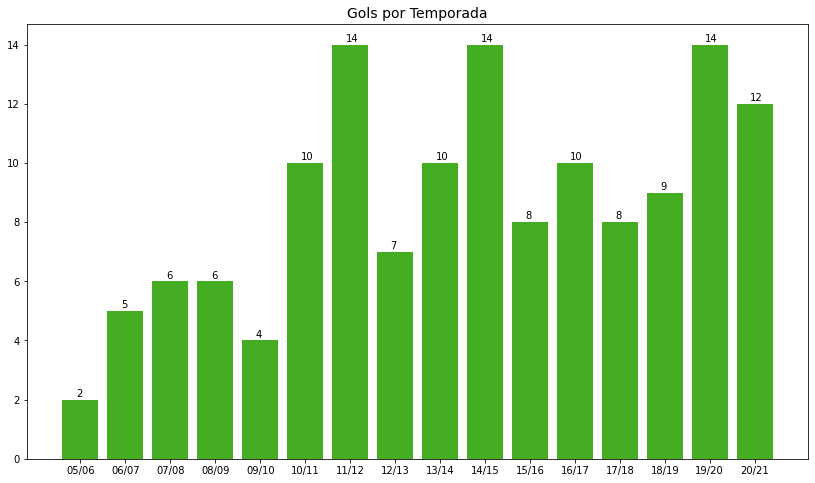

In [ ]:
plt.figure(figsize=(14, 8))

names = gols_por_temporada.index
valores = gols_por_temporada['Gol?']

plt.bar(names, valores, color='#44ad21')
for i in range(len(gols_por_temporada['Gol?'])):
  plt.text(x = posicao[i]-0.1, y = altura_gols[i]+0.1, s = str(gols_por_temporada['Gol?'].iloc[i]))

plt.title('Gols por Temporada', fontsize=14)

plt.savefig('grafico-GolsPorTemporada.png', bbox_inches='tight', dpi = 300)
plt.show()

# Pênaltis convertidos por Competição

In [ ]:
penaltis_por_competicao = pd.DataFrame(df.groupby(df['Competicao'])['Gol?'].count())
penaltis_por_competicao.sort_values(['Gol?'], ascending = False, inplace = True)
penaltis_por_competicao.rename(columns = {'Gol?': 'Gols'}, inplace = True)
penaltis_por_competicao

,Gols
Competicao,
LaLiga,72
Serie A,27
UEFA Champions League,22
Premier League,13
European Qualifiers,5
International Friendlies,4
World Cup qualification Europe,3
Coppa Italia,3
EURO 2020,3


In [ ]:
posicao = []
for i in range(len(penaltis_por_competicao.index)):
  posicao.append(i)

altura = []
for i in penaltis_por_competicao.Gols:
  altura.append(i)

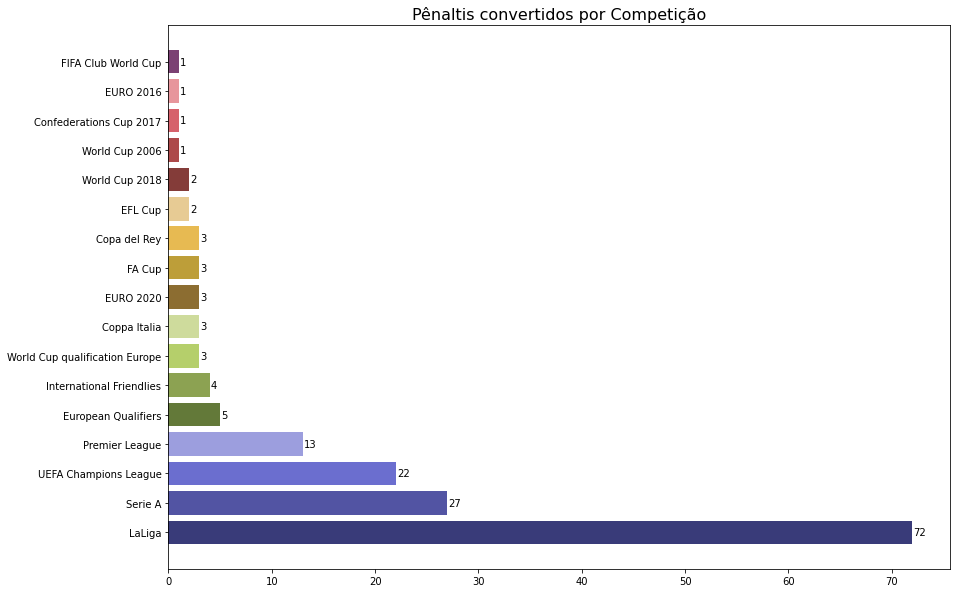

In [ ]:
plt.figure(figsize=(14, 10))

nomes = penaltis_por_competicao.index
valores = penaltis_por_competicao.Gols
color = get_cmap('tab20b').colors

plt.barh(nomes, valores, color=color)
for i in range(len(penaltis_por_competicao.Gols)):
  plt.text(x = altura[i]+0.1, y = posicao[i]-0.1, s = str(penaltis_por_competicao.Gols.iloc[i]))

plt.title('Pênaltis convertidos por Competição', fontsize=16)

plt.savefig('grafico-PenaltisConvertidosPorCompeticao.png', bbox_inches='tight', dpi = 300)
plt.show()